# Анализ картографических данных и прогнозирование доминирующего вида лесного покрова

Получаем набор данных c https://www.kaggle.com/uciml/forest-cover-type-dataset, содержащий информацию о лесном покрове в четырех областях Roosevelt National Forest in Colorado (национальный лес, расположенный с северной части штата Колорадо, США)

In [1]:
import pandas as pd
import numpy as np
import time
from math import fabs
import matplotlib.pyplot as pyplot
from sklearn.metrics import classification_report, f1_score
import seaborn as sns
import warnings

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

data = pd.read_csv('covtype.csv')
print('Количество признаков:', len(data.columns))
print('Количество объектов:', len(data))

Количество признаков: 55
Количество объектов: 581012


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [5]:
# data.plot.pie(y='Cover_Type', figsize=(5, 5))
# pyplot.figure(figsize=(10, 10))
# pyplot.pie(data, values='Cover_Type', labels='types')\
data['Cover_Type']

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int64

In [6]:
data.loc[:, 'Elevation' : 'Horizontal_Distance_To_Fire_Points'].describe()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


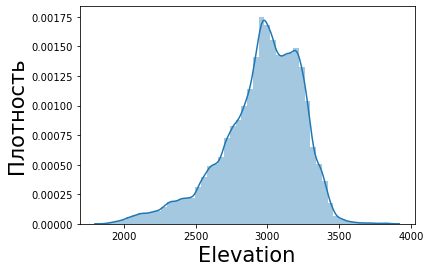

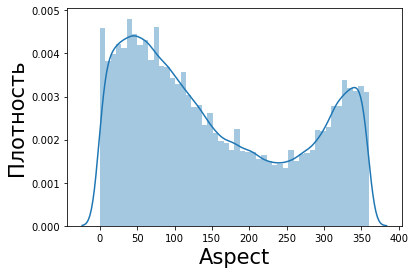

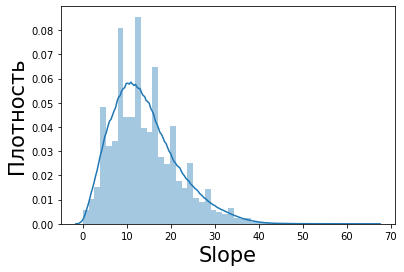

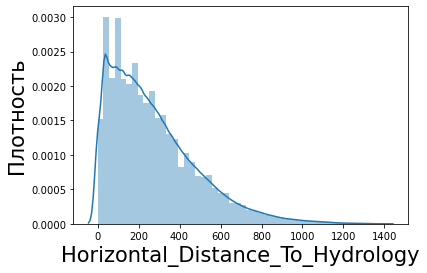

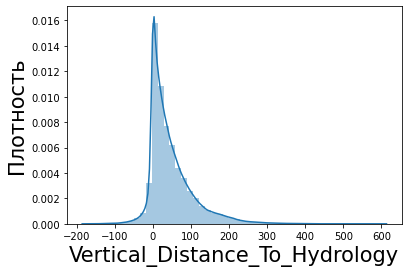

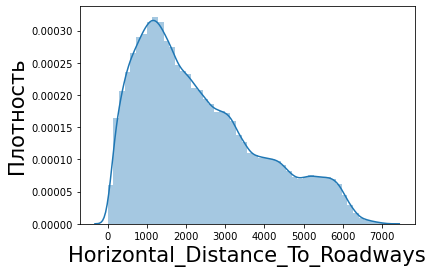

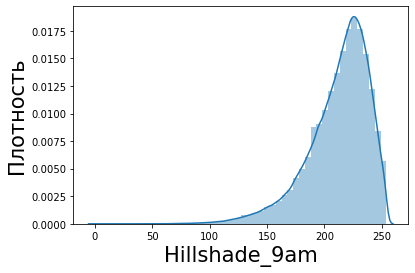

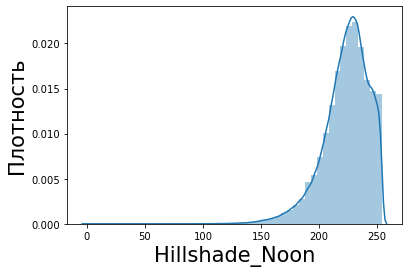

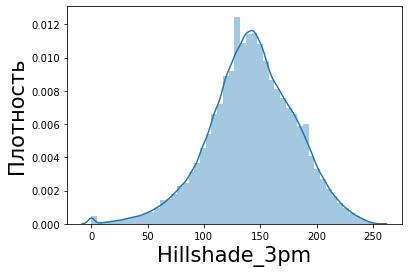

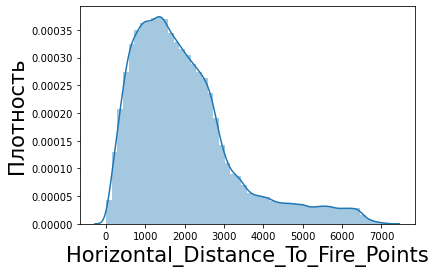

In [7]:
for index, col in enumerate(data.loc[:, 'Elevation' : 'Horizontal_Distance_To_Fire_Points']):
    pyplot.figure(index)
    pyplot.ylabel("Плотность", fontsize=21)
    pyplot.xlabel(col, fontsize=21)
    sns.distplot(data[col])

Посмотрим с какими данными коррелирует Cover_Type:

In [8]:
data.corr()['Cover_Type'].sort_values()

Elevation                            -0.269554
Wilderness_Area1                     -0.203913
Horizontal_Distance_To_Roadways      -0.153450
Soil_Type22                          -0.141746
Soil_Type23                          -0.135055
Soil_Type29                          -0.124933
Horizontal_Distance_To_Fire_Points   -0.108936
Hillshade_Noon                       -0.096426
Soil_Type32                          -0.075562
Soil_Type24                          -0.068746
Soil_Type31                          -0.065347
Soil_Type33                          -0.062502
Hillshade_3pm                        -0.048290
Wilderness_Area2                     -0.048059
Soil_Type19                          -0.036452
Hillshade_9am                        -0.035415
Soil_Type20                          -0.028665
Soil_Type21                          -0.025400
Soil_Type12                          -0.023601
Horizontal_Distance_To_Hydrology     -0.020317
Soil_Type27                          -0.014407
Soil_Type30  

Выявим самый популярный тип лесного покрова

Text(0, 0.5, 'Число квадратов')

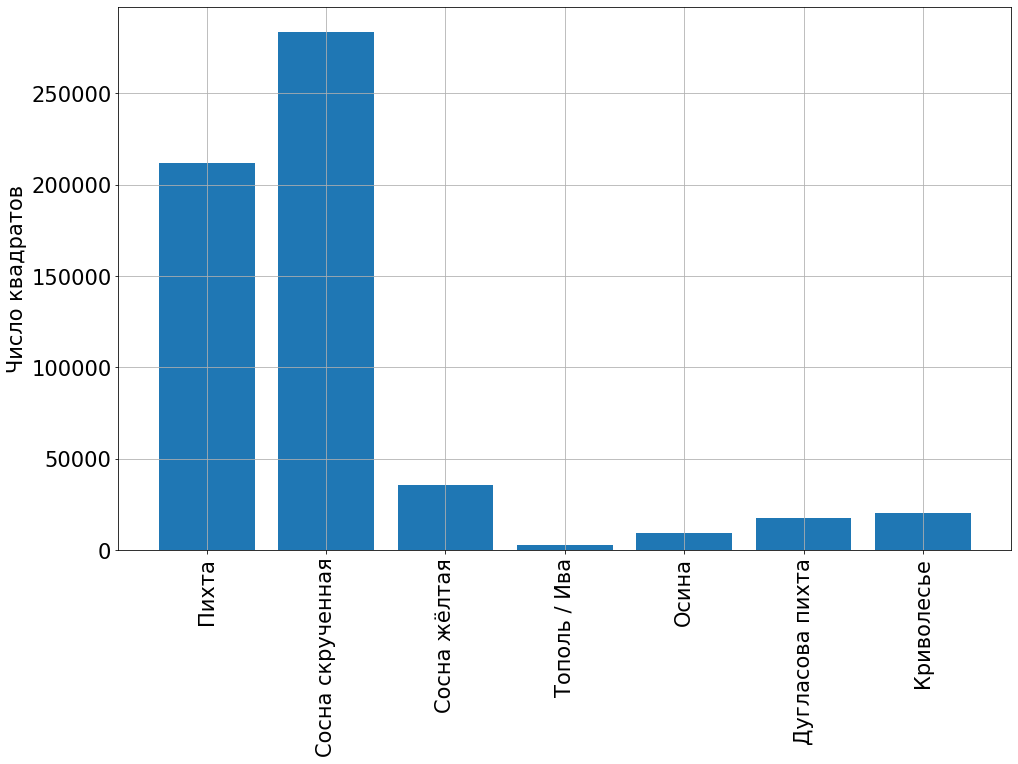

In [13]:
pyplot.rcParams.update({'font.size': 21})
pyplot.figure(figsize=(16, 10))
pyplot.grid(True)
pyplot.xticks(rotation='vertical')
x = ["Пихта", "Сосна скрученная", 
"Сосна жёлтая",
"Тополь / Ива",
"Осина",
"Дугласова пихта",
"Криволесье"
]
pyplot.bar(x, data['Cover_Type'].value_counts(sort=False))
pyplot.ylabel("Число квадратов")

In [10]:
for index, item in enumerate(data['Cover_Type'].value_counts(sort=False)):
    print('Cover_Type{}'.format(index + 1), ' -> ', '{}%'.format(("%.2f" % (item / len(data) * 100))))

Cover_Type1  ->  36.46%
Cover_Type2  ->  48.76%
Cover_Type3  ->  6.15%
Cover_Type4  ->  0.47%
Cover_Type5  ->  1.63%
Cover_Type6  ->  2.99%
Cover_Type7  ->  3.53%


In [11]:
data['Cover_Type'].value_counts(sort=False)

1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: Cover_Type, dtype: int64

Выводы:
   
    1) Пропусков в данных не выявлено

    2) Данные не нормализованы, что может стать помехой для некоторых алгоритмов
    
    3) Столбец Cover_Type слабо коррелирует с остальными параметрами
   

Для начала уменьшим размерность.
Каждая запись в наборе данных имеет 40 столбцов для обозначения типа почвы. Более оптимальный вариант хранения - использовать один столбец, содержащий номер доминирующего вида почвы в виде дискретной целой величины, принимающей значения от 1 до 40. Таким же образом поступим с Wilderness_Area1, Wilderness_Area2, Wilderness_Area3 и Wilderness_Area4:

In [35]:
optimized_data = data.drop(data.loc[:, 'Wilderness_Area1' : 'Wilderness_Area4'], axis = 1)
union_wilderness_data = pd.Series([0 for _ in range(len(data))])
for index, col in enumerate(data.loc[:, 'Wilderness_Area1' : 'Wilderness_Area4']):
    for item in np.where(data[col].values == 1):
        union_wilderness_data[item] = index + 1
optimized_data['Wilderness'] = union_wilderness_data

In [36]:
optimized_data = optimized_data.drop(optimized_data.loc[:, 'Soil_Type1' : 'Soil_Type40'], axis = 1)
union_soil_data = pd.Series([0 for _ in range(len(data))])
for index, col in enumerate(data.loc[:, 'Soil_Type1' : 'Soil_Type40']):
    for item in np.where(data[col].values == 1):
        union_soil_data[item] = index + 1
optimized_data['Soil_Type'] = union_soil_data

In [97]:
optimized_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471,2.114462
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504,1.061295
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,0.000000,0.000000

Посчитаем корреляции:

<AxesSubplot:>

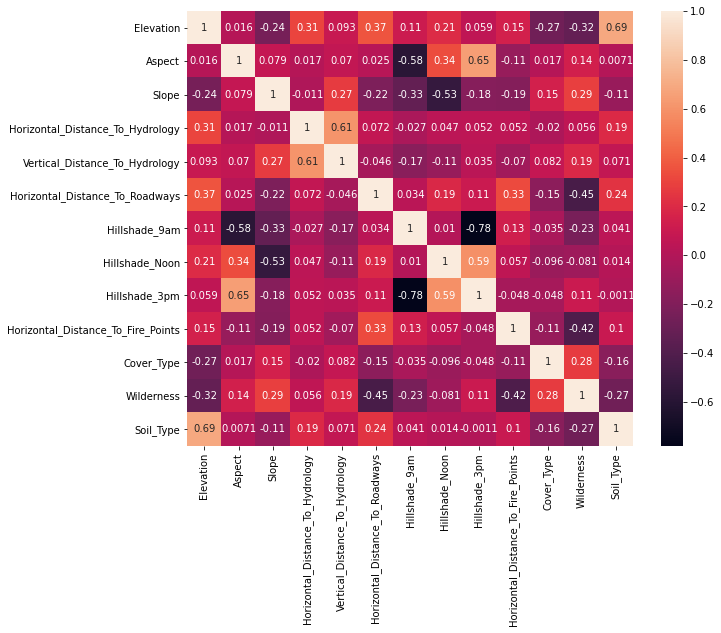

In [15]:
pyplot.figure(figsize=(10,8))
sns.heatmap(optimized_data.corr(), annot=True)

Отобразим в виде сетки:

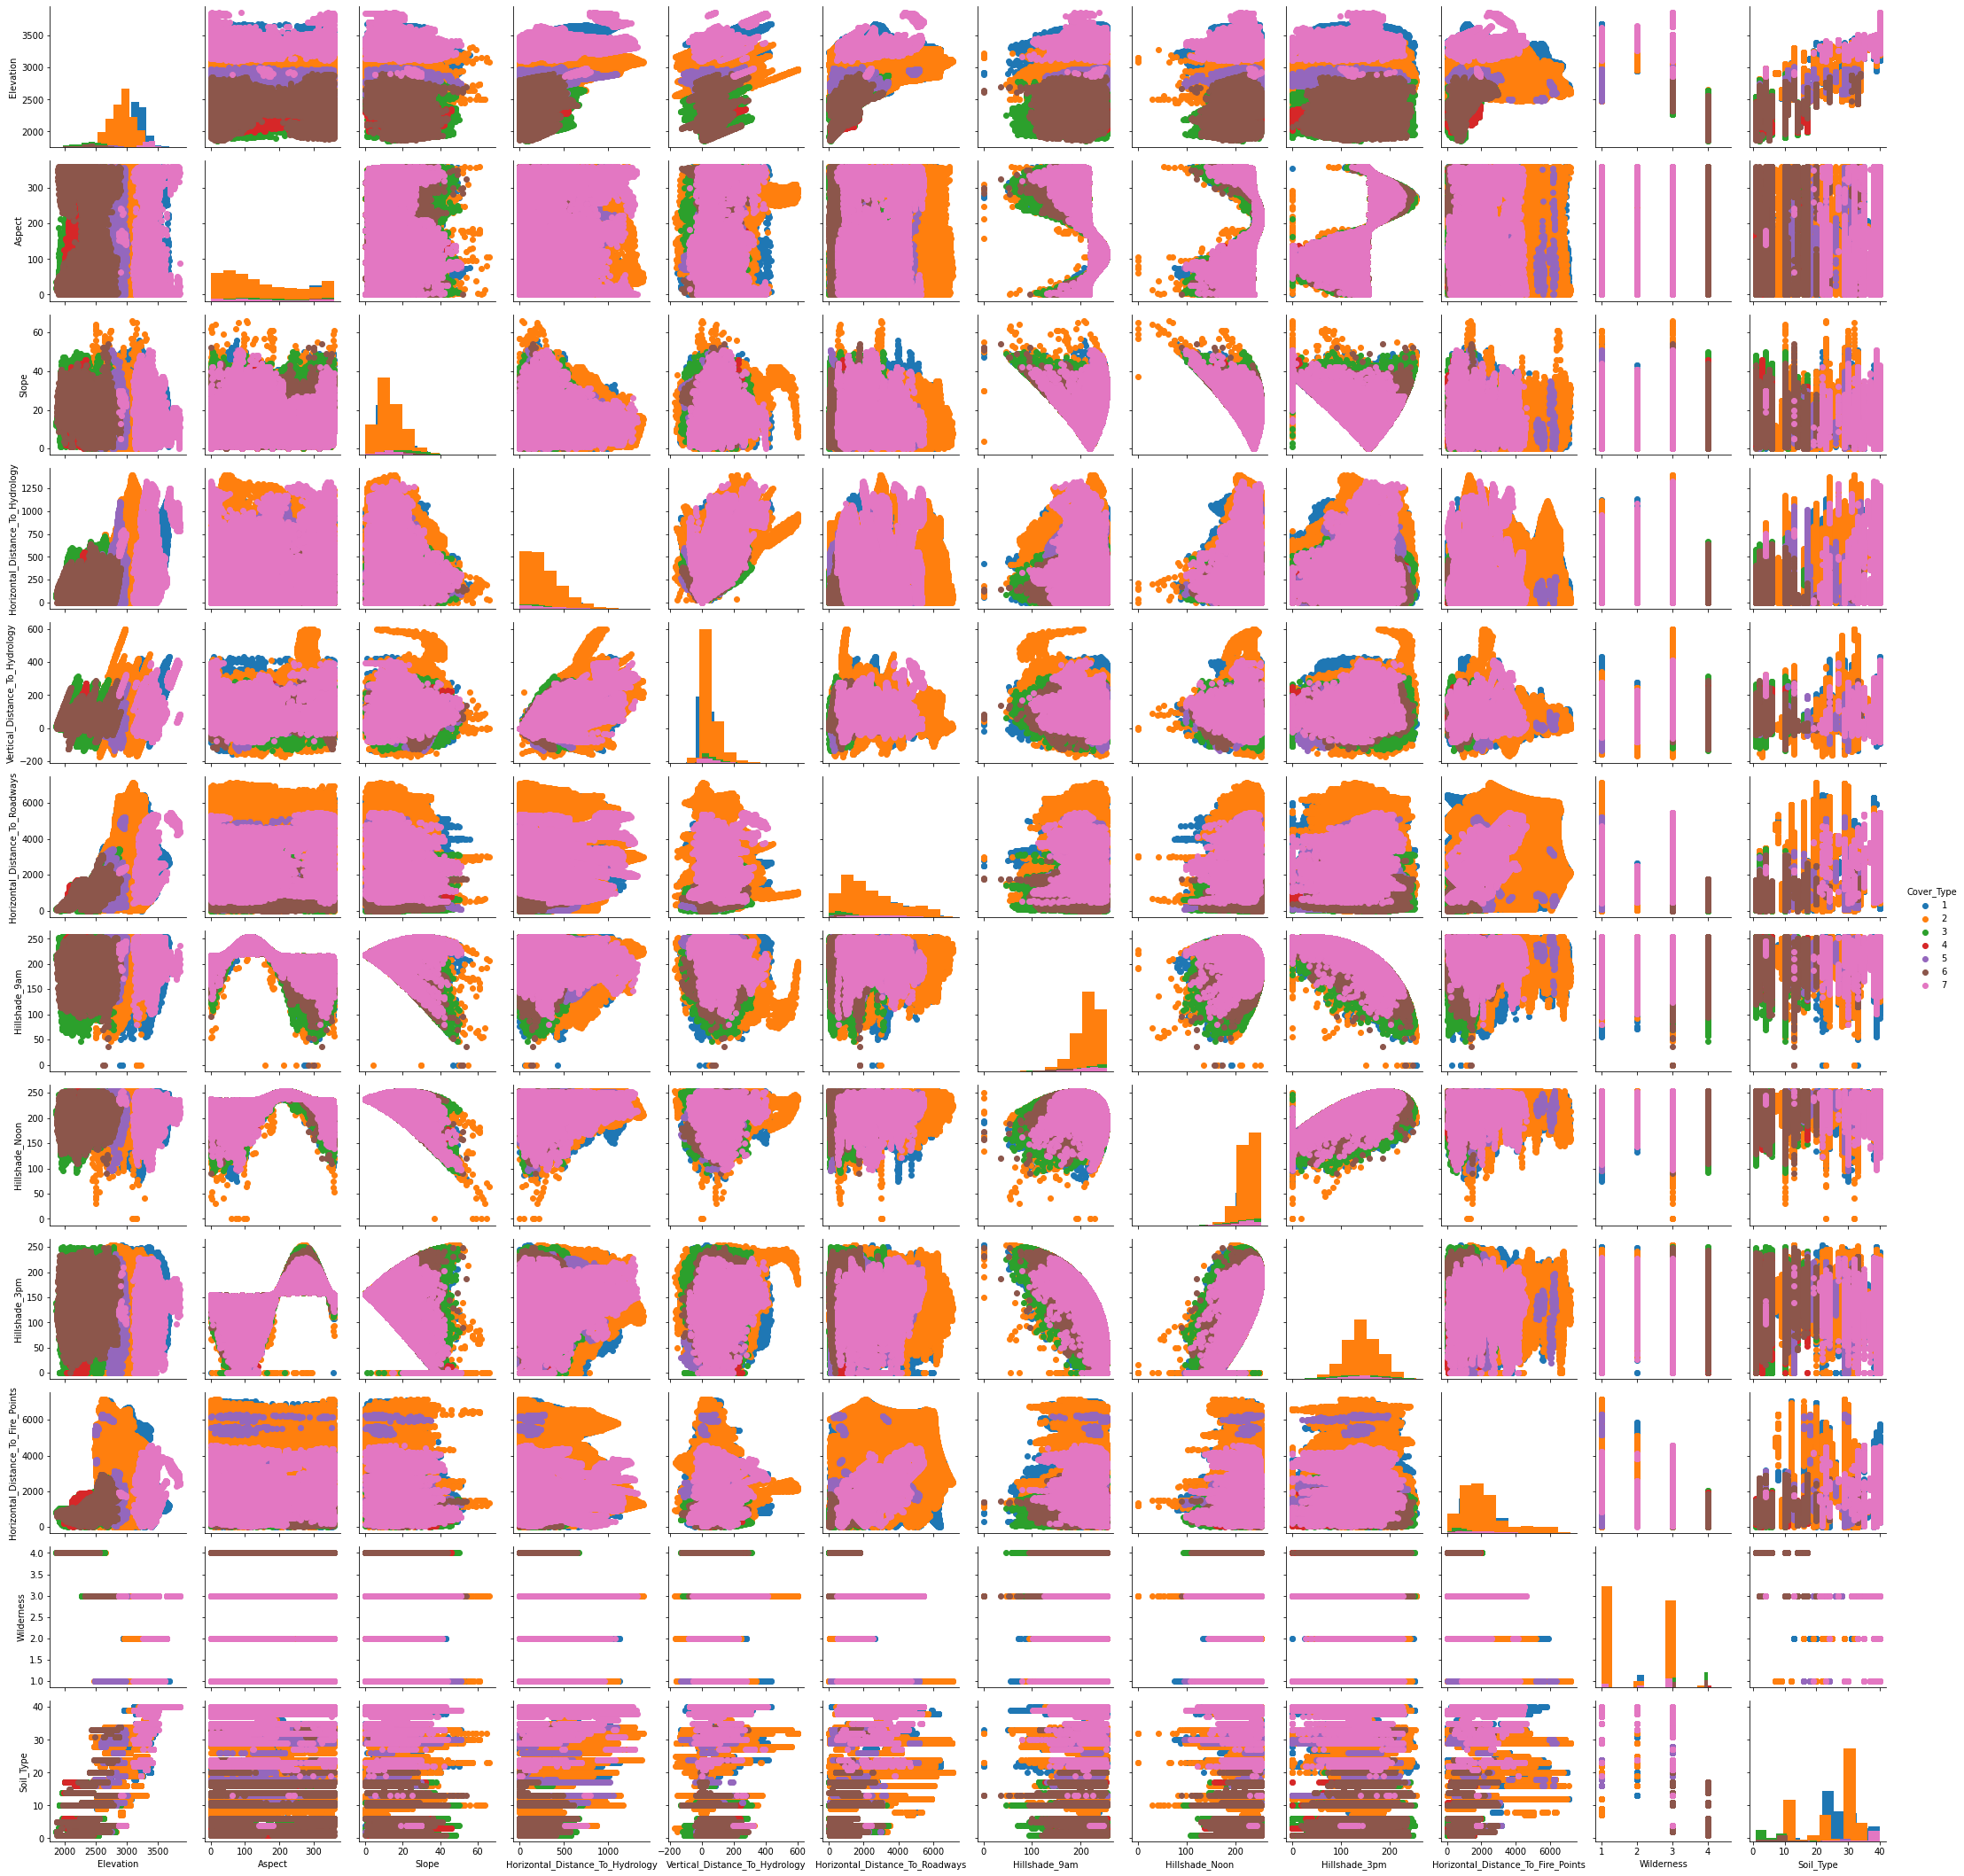

In [12]:
g = sns.PairGrid(optimized_data, hue="Cover_Type")
g.map_diag(pyplot.hist)
g.map_offdiag(pyplot.scatter)
g.add_legend()

Зависимость типа почвы от высоты

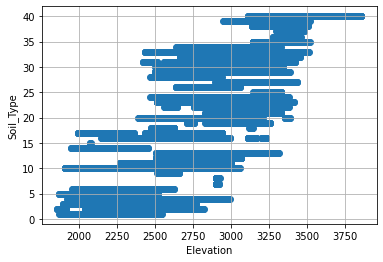

In [13]:
pyplot.grid(True)
pyplot.scatter(optimized_data['Elevation'][:], optimized_data['Soil_Type'][:])
pyplot.xlabel('Elevation')
pyplot.ylabel('Soil_Type')
pyplot.show()

Зависимость азимута от тени в 9 часов утра:

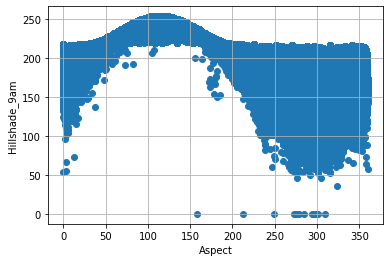

In [14]:
pyplot.grid(True)
pyplot.scatter(optimized_data['Aspect'][:], optimized_data['Hillshade_9am'][:])
pyplot.xlabel('Aspect')
pyplot.ylabel('Hillshade_9am')
pyplot.show()

Расстоние до источников воды также лучше мерить одним значением:

In [37]:
from math import sqrt
tmp = optimized_data.loc[:, 'Horizontal_Distance_To_Hydrology' : 'Vertical_Distance_To_Hydrology']
optimized_data = optimized_data.drop(tmp, axis = 1)
union_distance_data = pd.Series([0 for _ in range(len(data))])
for index in range(len(data)):
    horizontal = data['Horizontal_Distance_To_Hydrology'][index]
    vertical = data['Vertical_Distance_To_Hydrology'][index]
    union_distance_data[index] = sqrt(horizontal**2 + vertical**2)
optimized_data['Distance_To_Hydrology'] = union_distance_data

In [38]:
columns_list = optimized_data.columns.tolist()
columns_list = ['Elevation', 'Aspect', 'Slope','Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness',
 'Soil_Type', 'Cover_Type']
optimized_data = optimized_data[columns_list]

In [100]:
optimized_data.describe()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type17,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,275.659184,2350.146611,212.146049,223.318716,142.528263,1980.291226,2.114462,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.005890,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,216.989552,1559.254870,26.769889,19.768697,38.274529,1324.195210,1.061295,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.076518,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,229.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,393.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [19]:
optimized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Distance_To_Hydrology               581012 non-null  int64
 4   Horizontal_Distance_To_Roadways     581012 non-null  int64
 5   Hillshade_9am                       581012 non-null  int64
 6   Hillshade_Noon                      581012 non-null  int64
 7   Hillshade_3pm                       581012 non-null  int64
 8   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 9   Wilderness                          581012 non-null  int64
 10  Soil_Type                           581012 non-null  int64
 11  Cover_Type                          581012 non-null 

Таким образом удалось уменьшить размерность с 55 признаков до 11

Осталось нормализовать данные

In [27]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
optimized_normalized_data = optimized_data
tmp = mm_scaler.fit_transform(optimized_normalized_data.loc[:, :'Wilderness'])
optimized_normalized_data.loc[:, :'Wilderness'] = tmp

In [103]:
optimized_normalized_data.describe()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type17,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.550458,0.432380,0.213692,0.194400,0.330216,0.835221,0.879208,0.561135,0.276076,0.371487,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.005890,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,0.140062,0.310871,0.113458,0.153025,0.219089,0.105393,0.077830,0.150687,0.184608,0.353765,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.076518,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.475238,0.161111,0.136364,0.076164,0.155403,0.779528,0.838583,0.468504,0.142758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.568784,0.352778,0.196970,0.161495,0.280596,0.858268,0.889764,0.562992,0.238394,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.652326,0.722222,0.272727,0.277151,0.467613,0.909449,0.933071,0.661417,0.355500,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [22]:
optimized_normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Distance_To_Hydrology               581012 non-null  float64
 4   Horizontal_Distance_To_Roadways     581012 non-null  float64
 5   Hillshade_9am                       581012 non-null  float64
 6   Hillshade_Noon                      581012 non-null  float64
 7   Hillshade_3pm                       581012 non-null  float64
 8   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 9   Wilderness                          581012 non-null  float64
 10  Soil_Type                           581012 non-null  float64
 11  Cover_Type                

In [114]:
optimized_normalized_data['Cover_Type'] = optimized_normalized_data['Cover_Type'].astype('category')

Применим метод главных компонент на изначальном датасете:

In [29]:
mm_scaler = MinMaxScaler()
data2 = data
tmp = mm_scaler.fit_transform(data2.loc[:, :'Soil_Type40'])
data2.loc[:, :'Soil_Type40'] = tmp
data2['Cover_Type'] = data2['Cover_Type'].astype('category')

Elevation  ->  0.2998349553049385
Aspect  ->  0.08386445976724582
Slope  ->  0.06865156735916259
Horizontal_Distance_To_Hydrology  ->  0.06256785143155577
Vertical_Distance_To_Hydrology  ->  0.04963020931979208
Horizontal_Distance_To_Roadways  ->  0.04751601075217575
Hillshade_9am  ->  0.040974797795067436
Hillshade_Noon  ->  0.034336438188741936
Hillshade_3pm  ->  0.030176309079883484
Horizontal_Distance_To_Fire_Points  ->  0.028190002093021395
Wilderness_Area1  ->  0.02261565706693659
Wilderness_Area2  ->  0.022488671518233923
Wilderness_Area3  ->  0.019011337825399377
Wilderness_Area4  ->  0.018414316323618153
Soil_Type1  ->  0.016249742874570018
Soil_Type2  ->  0.015096788428459795
Soil_Type3  ->  0.014008387692187168
Soil_Type4  ->  0.013264238168782647
Soil_Type5  ->  0.012132673954613269
Soil_Type6  ->  0.011511291821469257
Soil_Type7  ->  0.010556773876657646
Soil_Type8  ->  0.008643987411382927
Soil_Type9  ->  0.008560964777129889
Soil_Type10  ->  0.00761503055063544
Soil_Type

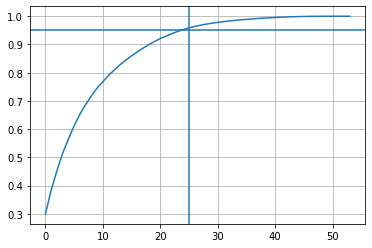

In [25]:
from sklearn.decomposition import PCA
X = data2.drop(['Cover_Type'], axis=1)
pca = PCA(n_components=len(X.columns))
pca.fit_transform(X)
for index, ratio in enumerate(pca.explained_variance_ratio_):
    print(X.columns[index], ' -> ', ratio)
    
pyplot.grid(True)
pyplot.plot(np.cumsum(pca.explained_variance_ratio_))
pyplot.axhline(0.95)
pyplot.axvline(25)

25 компонент достаточно для описания 95% данных.

Применим метод главных компонент для итоговых данных:

Elevation  ->  0.35923320578356377
Aspect  ->  0.24161117635776483
Slope  ->  0.13196496267661317
Distance_To_Hydrology  ->  0.07775059878236541
Horizontal_Distance_To_Roadways  ->  0.05467847786153049
Hillshade_9am  ->  0.04508788960875237
Hillshade_Noon  ->  0.03840265490564867
Hillshade_3pm  ->  0.02947234214487022
Horizontal_Distance_To_Fire_Points  ->  0.014849885902723226
Wilderness  ->  0.00685241471873466
Soil_Type  ->  9.639125743315599e-05


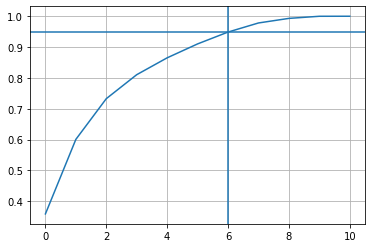

In [26]:
from sklearn.decomposition import PCA
X = optimized_normalized_data.drop(['Cover_Type'], axis=1)
pca = PCA(n_components=len(X.columns))
pca.fit_transform(X)
for index, ratio in enumerate(pca.explained_variance_ratio_):
    print(X.columns[index], ' -> ', ratio)
    
pyplot.grid(True)
pyplot.plot(np.cumsum(pca.explained_variance_ratio_))
pyplot.axhline(0.95)
pyplot.axvline(6)

Проверим коэффициенты асимметрии:

Elevation                            -0.817596
Aspect                                0.402628
Slope                                 0.789273
Distance_To_Hydrology                 1.134374
Horizontal_Distance_To_Roadways       0.713679
Hillshade_9am                        -1.181147
Hillshade_Noon                       -1.063056
Hillshade_3pm                        -0.277053
Horizontal_Distance_To_Fire_Points    1.288644
Wilderness                            0.090308
Soil_Type                            -0.704271
dtype: float64

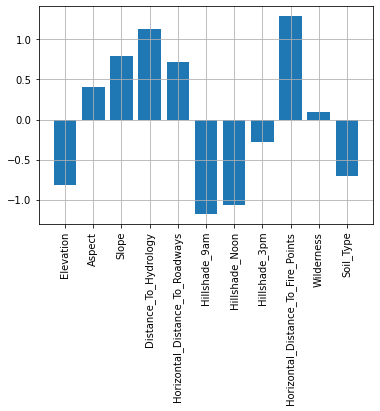

In [27]:
pyplot.grid(True)
pyplot.xticks(rotation='vertical')
pyplot.bar(optimized_normalized_data.columns[:-1], optimized_normalized_data.skew())
optimized_normalized_data.skew()

Наибольшие коэффициенты корреляции:

Hillshade_9am ~ Hillshade_3pm (-0.780296)

Elevation ~ Soil_Type (0.689848)

Aspect ~ Hillshade_3pm (0.646944)

Можно исключить Hillshade_3pm:

In [32]:
optimized_normalized_data = optimized_normalized_data.drop(['Hillshade_3pm'], axis=1)

Прогоним PCA еще раз:

,feature,importance
0,Elevation,0.375741
1,Aspect,0.229218
2,Slope,0.138491
3,Distance_To_Hydrology,0.081202
4,Horizontal_Distance_To_Roadways,0.057525
5,Hillshade_9am,0.047305
6,Hillshade_Noon,0.035695
7,Horizontal_Distance_To_Fire_Points,0.015682
8,Wilderness,0.012746
9,Soil_Type,0.006395


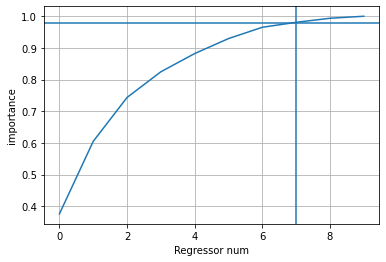

In [29]:
from sklearn.decomposition import PCA
X = optimized_normalized_data.drop(['Cover_Type'], axis=1)
pca = PCA(n_components=len(X.columns))
pca.fit_transform(X)
    
pyplot.grid(True)
pyplot.plot(np.cumsum(pca.explained_variance_ratio_))
pyplot.axhline(0.98)
pyplot.axvline(7)
pyplot.xlabel('Regressor num')
pyplot.ylabel('importance')

pd.DataFrame({'feature': list(optimized_normalized_data.columns[:-1]), 'importance': pca.explained_variance_ratio_})

Для описания 98% данных потребовалось 7 компонент

Все приготовления для данных готовы. Разделим выборку на 2 части: для обучения и для тестирования. Делить будем в отношении 3:1

In [33]:
from sklearn.model_selection import train_test_split

target = optimized_normalized_data.Cover_Type
train = optimized_normalized_data.drop(['Cover_Type'], axis = 1)
models_results = []

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=16)

Случайный лес (ExtraTreesClassifier):

In [116]:
from sklearn.ensemble import ExtraTreesClassifier

extraTreesClassifier_estimators = []
extraTreesClassifier_report = []
extraTreesClassifier_f1_weight = []
extraTreesClassifier_f1_micro = []
extraTreesClassifier_train_time = []
extraTreesClassifier_predict_time = []
extraTreesClassifier_feature_importances = []
# estimators = 10

for estimators in range(100, 270, 10):
    trees = ExtraTreesClassifier(n_estimators = estimators, max_features=10)

    start_time = time.time()
    trees.fit(x_train, y_train)
    extraTreesClassifier_train_time.append(time.time() - start_time)

    start_time = time.time()
    trees_result = trees.predict(x_test)
    extraTreesClassifier_predict_time.append(time.time() - start_time)

    extraTreesClassifier_report.append(classification_report(y_test, trees_result))
    extraTreesClassifier_f1_weight.append(f1_score(y_test, trees_result, average='weighted'))
    extraTreesClassifier_f1_micro.append(f1_score(y_test, trees_result, average='micro'))
    extraTreesClassifier_estimators.append(estimators)
    extraTreesClassifier_feature_importances.append(trees.feature_importances_)
    
    print("Estimators={}, f1 (weight)={}".format(estimators, extraTreesClassifier_f1_weight[-1]))
    print("Estimators={}, f1 (micro)={}\n".format(estimators, extraTreesClassifier_f1_micro[-1]))

Estimators=160, f1 (weight)=0.9726376297872188
Estimators=160, f1 (micro)=0.9726752631615182



In [94]:
x_test['Soil_Type'].value_counts

<bound method IndexOpsMixin.value_counts of 433102    0.256410
87269     0.717949
245488    0.230769
189165    0.564103
307227    0.974359
            ...   
175796    0.743590
97969     0.743590
339838    0.794872
332097    0.794872
462468    0.564103
Name: Soil_Type, Length: 145253, dtype: float64>

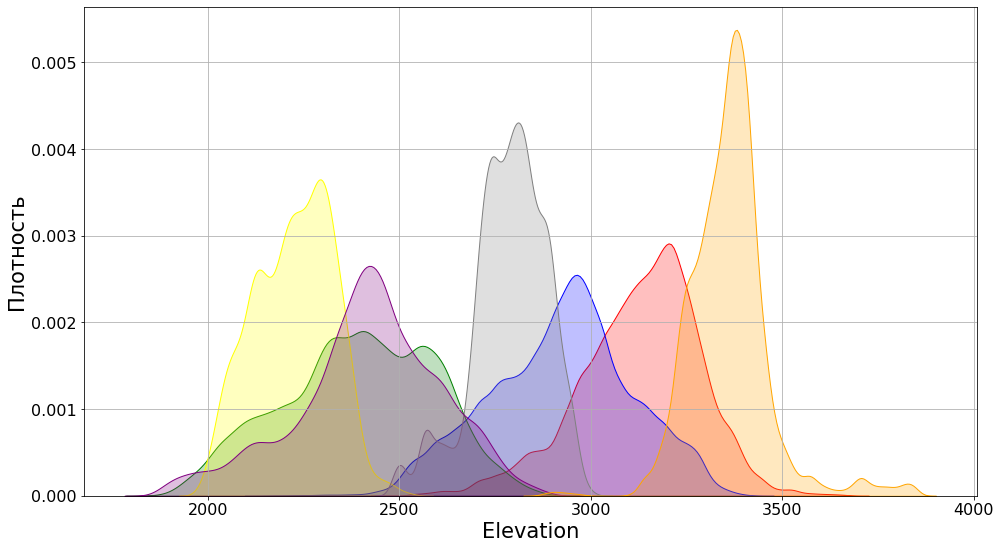

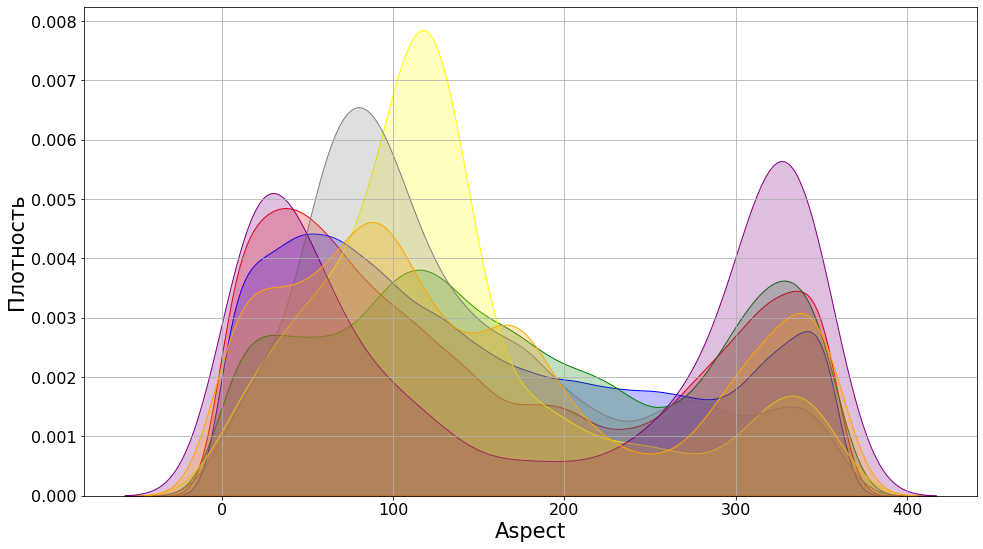

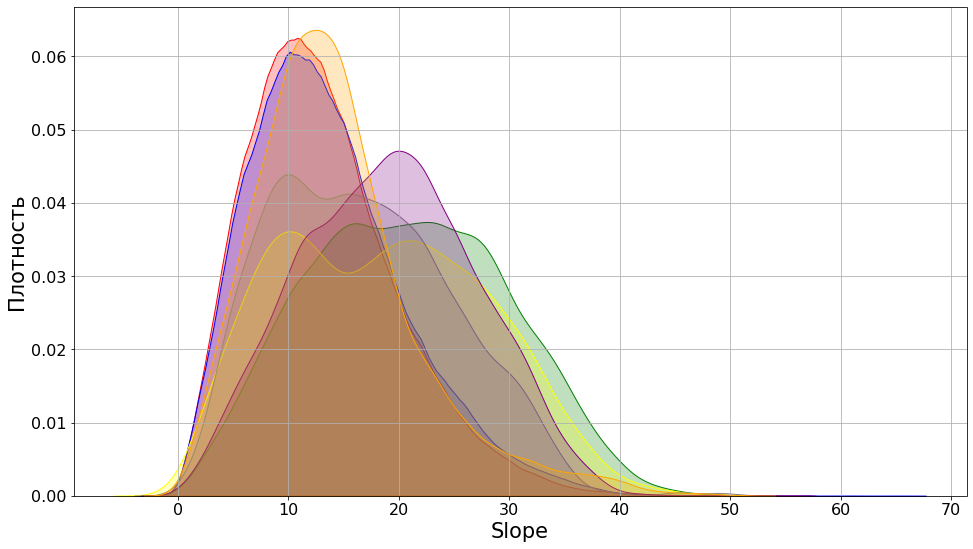

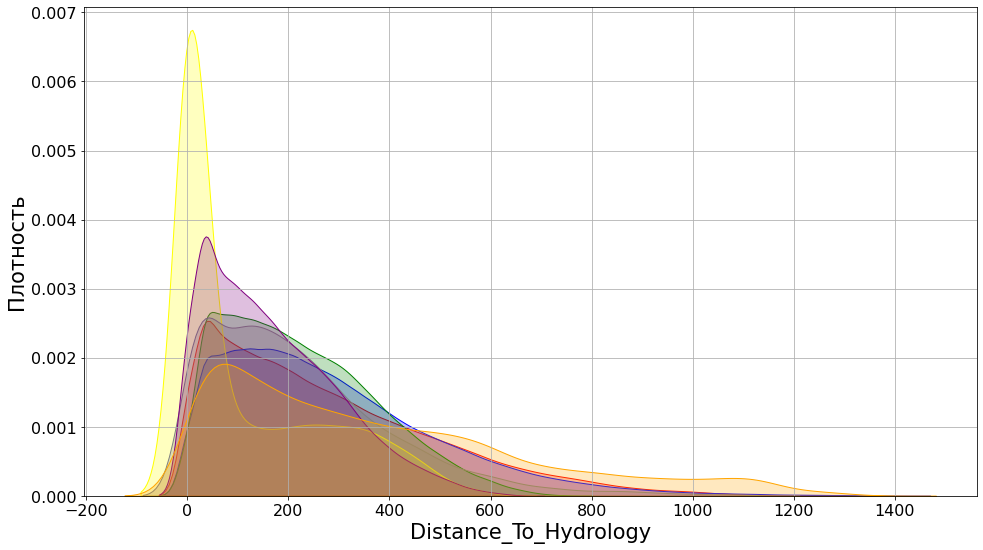

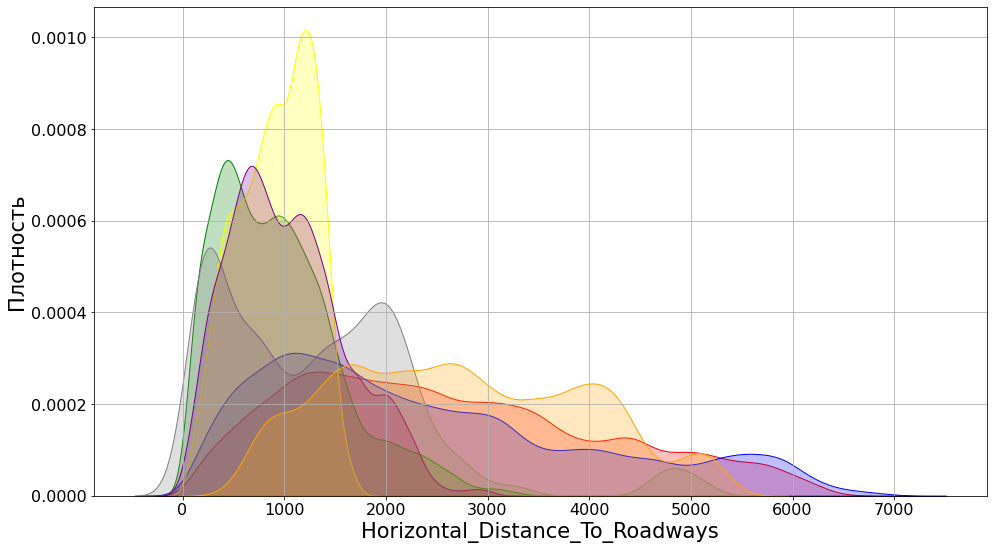

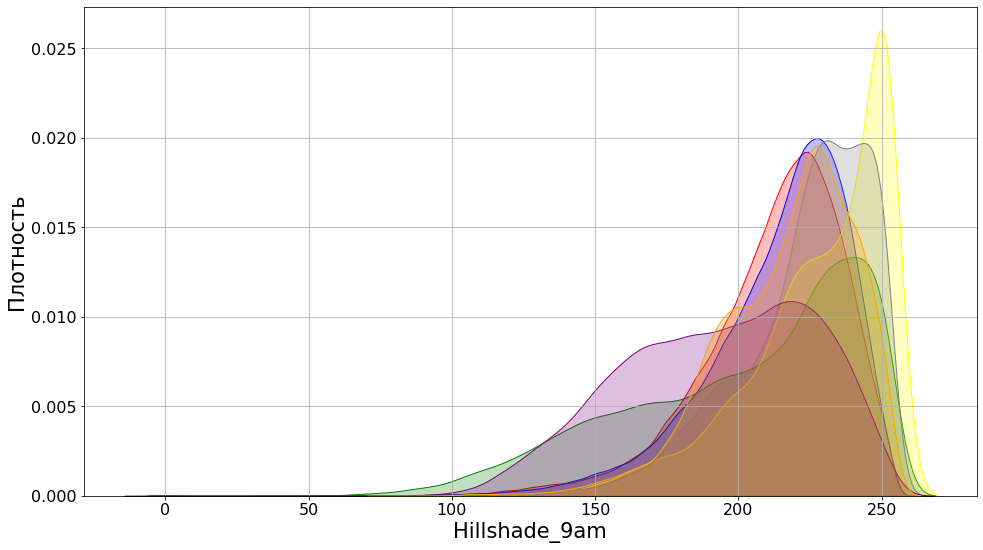

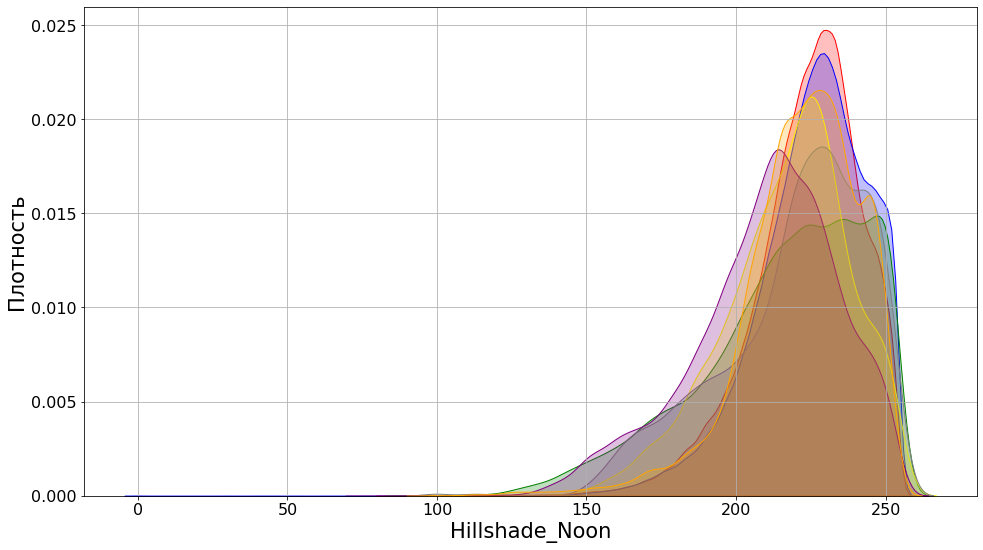

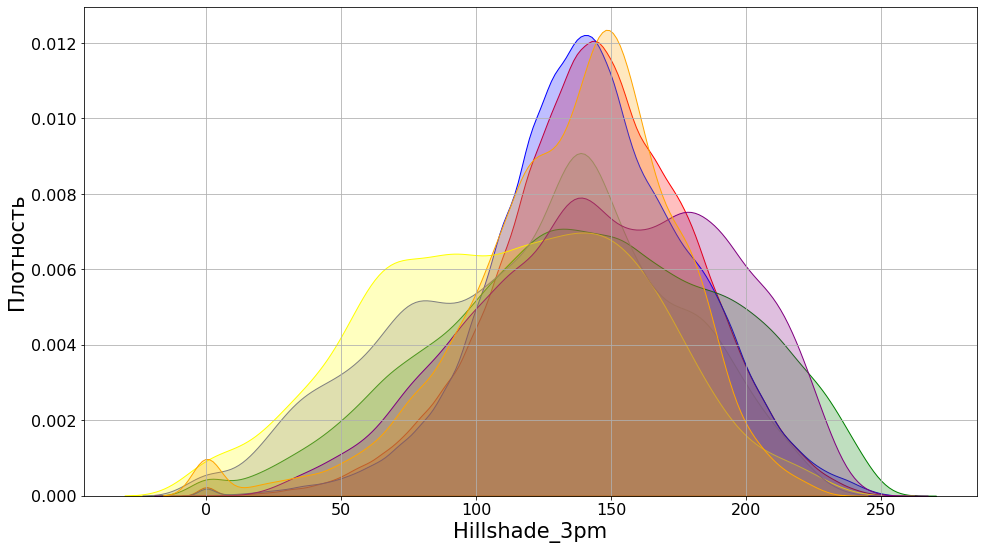

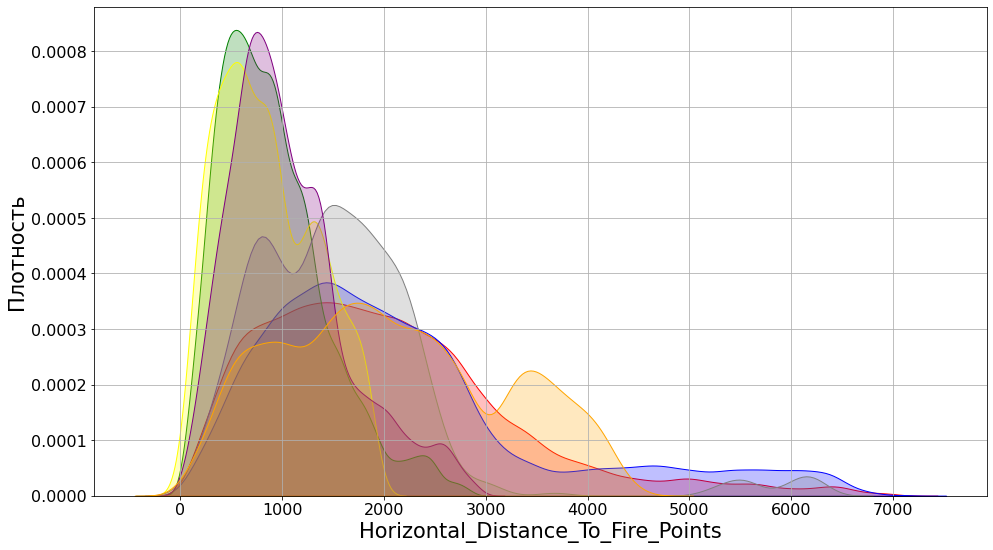

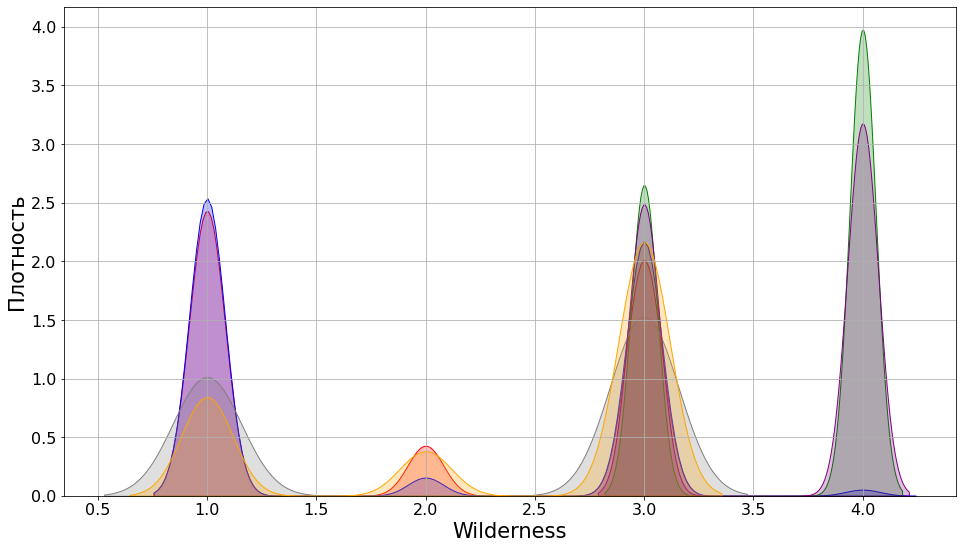

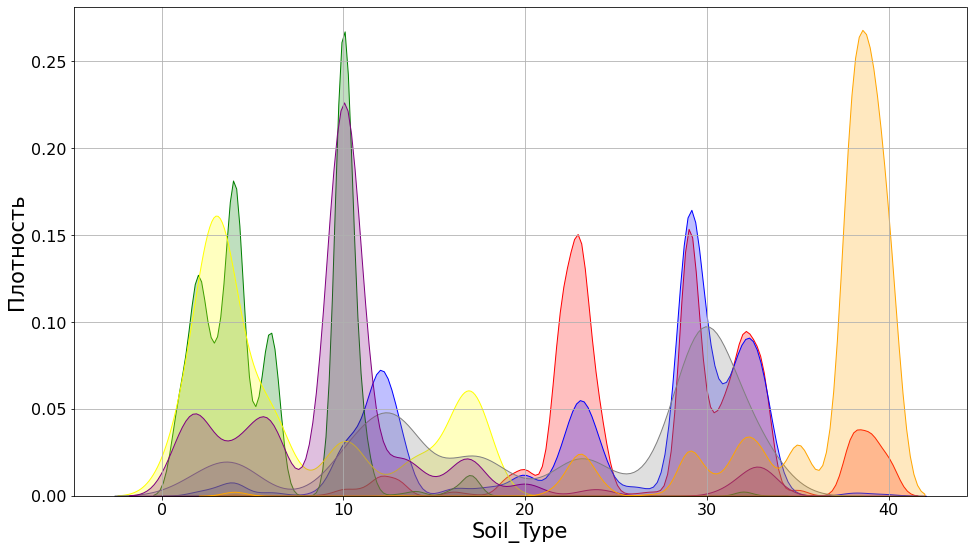

In [41]:
pyplot.rcParams.update({'font.size': 16})
tmp = optimized_data.copy()
# tmp.insert(10, "Cover_Type", trees_result)
for param in tmp:
    if param == "Cover_Type":
        break
    pyplot.figure(figsize=(16, 9))
    pyplot.grid(True)
    sns.kdeplot(tmp[tmp["Cover_Type"] == 1][param], shade=True, color='red', label="Cover_Type = 1 (Пихта)")
    sns.kdeplot(tmp[tmp["Cover_Type"] == 2][param], shade=True, color='blue', label="Cover_Type = 2 (Сосна скрученная)")
    sns.kdeplot(tmp[tmp["Cover_Type"] == 3][param], shade=True, color='green', label="Cover_Type = 3 (Сосна желтая)")
    sns.kdeplot(tmp[tmp["Cover_Type"] == 4][param], shade=True, color='yellow', label="Cover_Type = 4 (Тополь)")
    sns.kdeplot(tmp[tmp["Cover_Type"] == 5][param], shade=True, color='gray', label="Cover_Type = 5 (Осина)")
    sns.kdeplot(tmp[tmp["Cover_Type"] == 6][param], shade=True, color='purple', label="Cover_Type = 6 (Дугласова пихта)")
    sns.kdeplot(tmp[tmp["Cover_Type"] == 7][param], shade=True, color='orange', label="Cover_Type = 7 (Криволесье)")
    pyplot.xlabel(param, fontsize=21)
    pyplot.ylabel("Плотность", fontsize=21)
#     pyplot.legend(loc='upper left')

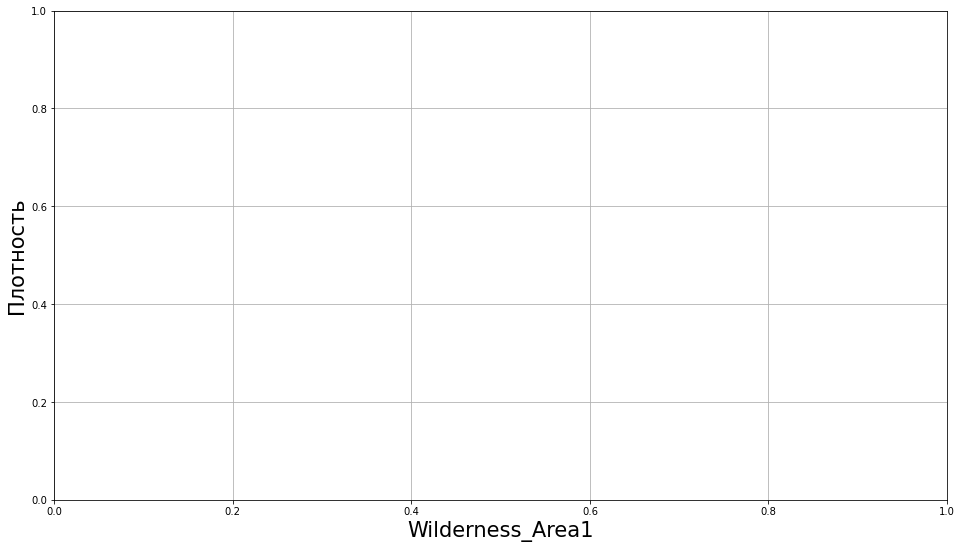

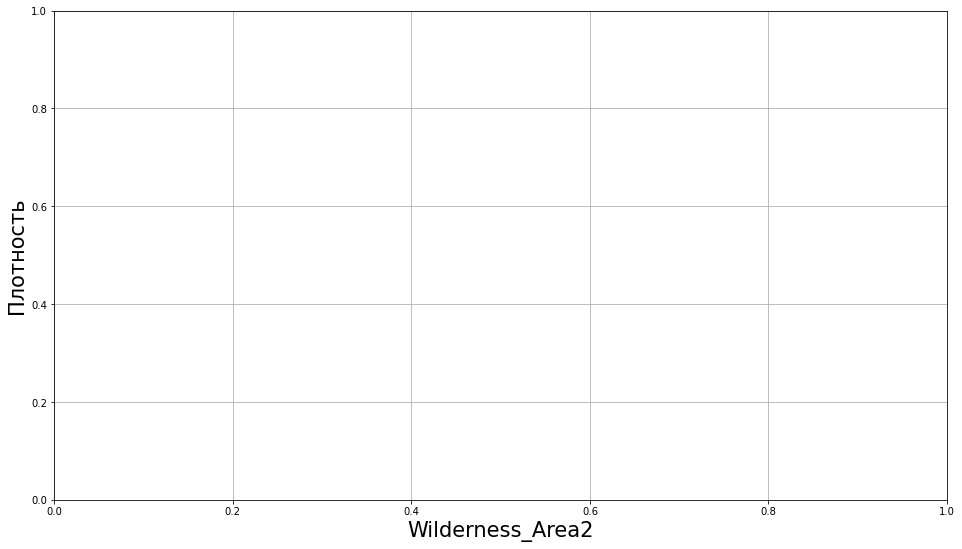

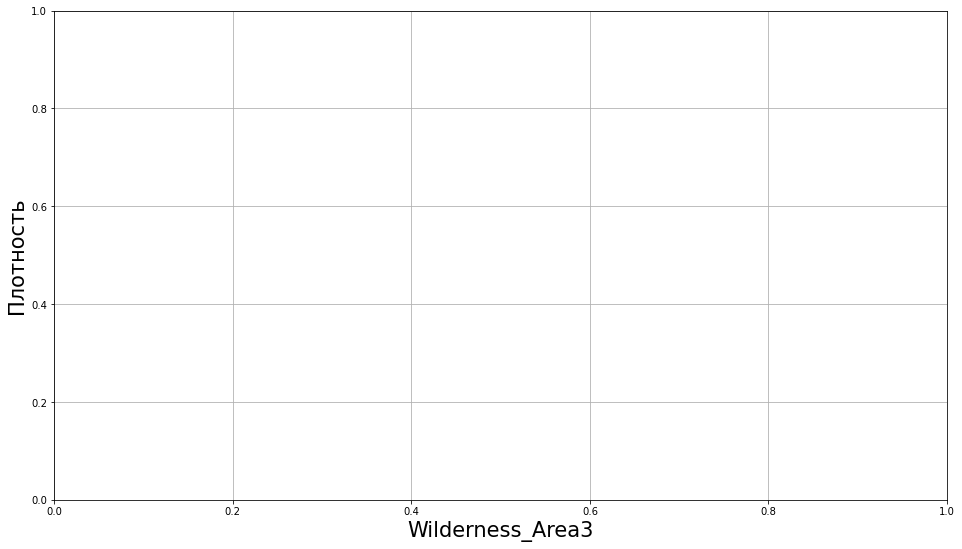

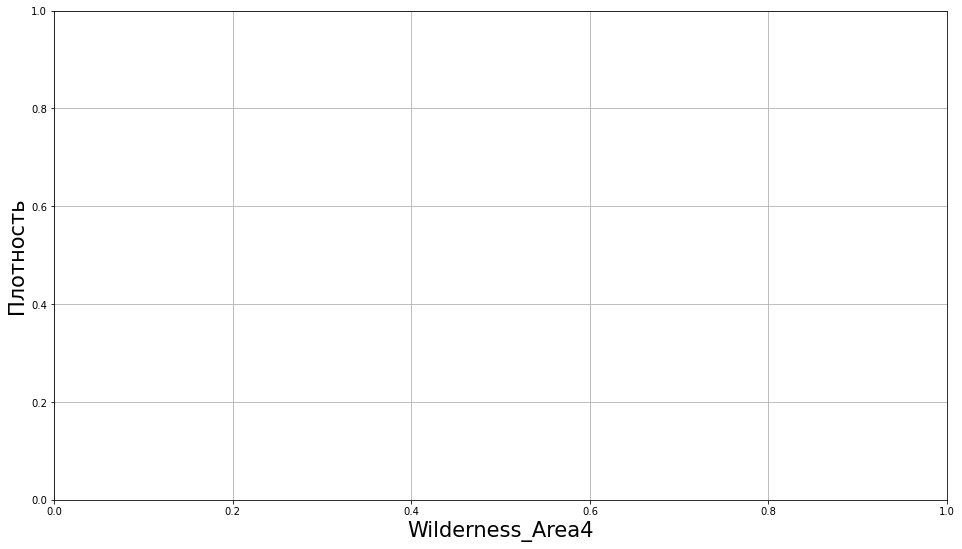

In [21]:
pyplot.rcParams.update({'font.size': 10})
tmp = data.copy()
for param in ["Wilderness_Area{}".format(i) for i in range(1,5)]:
    pyplot.figure(figsize=(16, 9))
    pyplot.grid(True)
    tt1 = tmp[(tmp["Cover_Type"] == 1) & (tmp[param] == 1)]
    tt2 = tmp[(tmp["Cover_Type"] == 2) & (tmp[param] == 1)]
    tt3 = tmp[(tmp["Cover_Type"] == 3) & (tmp[param] == 1)]
    tt4 = tmp[(tmp["Cover_Type"] == 4) & (tmp[param] == 1)]
    tt5 = tmp[(tmp["Cover_Type"] == 5) & (tmp[param] == 1)]
    tt6 = tmp[(tmp["Cover_Type"] == 6) & (tmp[param] == 1)]
    tt7 = tmp[(tmp["Cover_Type"] == 7) & (tmp[param] == 1)]
#     sns.kdeplot(tmp[(tmp["Cover_Type"] == 1)][param], shade=True, color='red', label="Cover_Type = 1 (Пихта)")
#     sns.kdeplot(tmp[(tmp["Cover_Type"] == 2)][param], shade=True, color='blue', label="Cover_Type = 2 (Сосна скрученная)")
#     sns.kdeplot(tmp[(tmp["Cover_Type"] == 3)][param], shade=True, color='green', label="Cover_Type = 3 (Сосна желтая)")
#     sns.kdeplot(tmp[(tmp["Cover_Type"] == 4)][param], shade=True, color='yellow', label="Cover_Type = 4 (Тополь)")
#     sns.kdeplot(tmp[(tmp["Cover_Type"] == 5)][param], shade=True, color='gray', label="Cover_Type = 5 (Осина)")
#     sns.kdeplot(tmp[(tmp["Cover_Type"] == 6)][param], shade=True, color='purple', label="Cover_Type = 6 (Дугласова пихта)")
#     sns.kdeplot(tmp[(tmp["Cover_Type"] == 7)][param], shade=True, color='orange', label="Cover_Type = 7 (Криволесье)")
    pyplot.xlabel(param, fontsize=21)
    pyplot.ylabel("Плотность", fontsize=21)
#     pyplot.legend(loc='upper left')

In [22]:
g = sns.catplot(x="Cover_Type", hue="Wilderness_Area1", col="Elevation", data=data, kind="count",height=4, aspect=.7);

ValueError: Image size of 398764x288 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 398764x288 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 398765x288 with 1978 Axes>

In [ ]:
pyplot.grid(True)
pyplot.plot(extraTreesClassifier_estimators, extraTreesClassifier_f1_weight, color="#FF0000", label='weight')
pyplot.plot(extraTreesClassifier_estimators, extraTreesClassifier_f1_micro, color="#0000FF", label='micro')
pyplot.xlabel('estimators')
pyplot.ylabel('f1 score')
pyplot.legend()
pyplot.show()

In [32]:
best_f1_weight = max(extraTreesClassifier_f1_weight)
index = extraTreesClassifier_f1_weight.index(best_f1_weight)
print('Best f1 (weight): ', best_f1_weight)
print('Estimatos num: ', extraTreesClassifier_estimators[index])
print('Train time: ', extraTreesClassifier_train_time[index])
print('Predict time: ', extraTreesClassifier_predict_time[index])
print(extraTreesClassifier_report[index])

Best f1 (weight):  0.9728362100552028
Estimatos num:  160
Train time:  92.28596615791321
Predict time:  4.98570704460144
              precision    recall  f1-score   support

           1       0.98      0.97      0.97     52801
           2       0.97      0.98      0.98     70969
           3       0.97      0.97      0.97      8929
           4       0.93      0.88      0.91       712
           5       0.93      0.90      0.91      2396
           6       0.96      0.95      0.95      4391
           7       0.98      0.97      0.98      5055

    accuracy                           0.97    145253
   macro avg       0.96      0.95      0.95    145253
weighted avg       0.97      0.97      0.97    145253



In [ ]:
best_f1_micro = max(extraTreesClassifier_f1_micro)
index = extraTreesClassifier_f1_micro.index(best_f1_micro)
print('Best f1 (micro): ', best_f1_micro)
print('Estimatos num: ', extraTreesClassifier_estimators[index])
print('Train time: ', extraTreesClassifier_train_time[index])
print('Predict time: ', extraTreesClassifier_predict_time[index])
print(extraTreesClassifier_report[index])

NameError: name 'train' is not defined

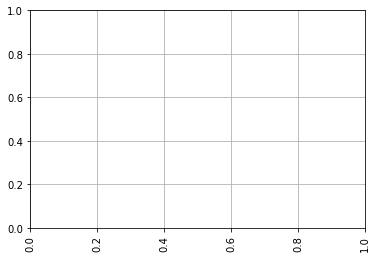

In [8]:
pyplot.grid(True)
pyplot.xticks(rotation='vertical')
pyplot.bar(train.columns, extraTreesClassifier_feature_importances[index])

In [41]:
pd.DataFrame({'feature': list(x_train.columns),
                   'importance': extraTreesClassifier_feature_importances[index]}).sort_values('importance', ascending = False).head(len(x_train.columns))

,feature,importance
0,Elevation,0.256204
9,Soil_Type,0.153191
4,Horizontal_Distance_To_Roadways,0.144210
7,Horizontal_Distance_To_Fire_Points,0.139680
3,Distance_To_Hydrology,0.076286
8,Wilderness,0.068756
1,Aspect,0.048337
6,Hillshade_Noon,0.041216
5,Hillshade_9am,0.040011
2,Slope,0.032108


In [ ]:
pyplot.grid(True)
pyplot.plot(extraTreesClassifier_estimators, extraTreesClassifier_train_time)
pyplot.xlabel('estimators')
pyplot.ylabel('train time')
pyplot.show()

In [ ]:
pyplot.grid(True)
pyplot.plot(extraTreesClassifier_estimators, extraTreesClassifier_predict_time)
pyplot.xlabel('estimators')
pyplot.ylabel('predict time')
pyplot.show()

Добавим результат в итоговую таблицу:

In [97]:
models_results.append(['ExtraTreesClassifier', best_f1_weight, best_f1_micro, extraTreesClassifier_train_time[index], extraTreesClassifier_predict_time[index]])

Метод k ближайших соседей:

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn_neighbors = []
knn_f1 = []
knn_f1_micro = []
knn_report = []
knn_train_time = []
knn_predict_time = []
# neighbors = 1

for neighbors in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=neighbors)

    start_time = time.time()
    knn.fit(x_train, y_train)
    knn_train_time.append(time.time() - start_time)

    start_time = time.time()
    knn_predict_result = knn.predict(x_test)
    knn_predict_time.append(time.time() - start_time)

    knn_neighbors.append(neighbors)
    knn_f1.append(f1_score(y_test, knn_predict_result, average='weighted'))
    knn_f1_micro.append(f1_score(y_test, knn_predict_result, average='micro'))
    knn_report.append(classification_report(y_test, knn_predict_result))
    
    print("neighbors={}, f1 ={}".format(neighbors, knn_f1[-1]))
    print("neighbors={}, f1 (micro)={}".format(neighbors, knn_f1_micro[-1]))

neighbors=1, f1 =0.9382555113256477
neighbors=200, f1 (micro)=0.9382525662120575
neighbors=2, f1 =0.9275096805522681
neighbors=200, f1 (micro)=0.9278913344302699
neighbors=3, f1 =0.9365398108361305
neighbors=200, f1 (micro)=0.936634699455433
neighbors=4, f1 =0.9307797211058881
neighbors=200, f1 (micro)=0.9310375689314506
neighbors=5, f1 =0.9318049584540262
neighbors=200, f1 (micro)=0.9319600972096962
neighbors=6, f1 =0.9275515960538427
neighbors=200, f1 (micro)=0.9278156044969811
neighbors=7, f1 =0.9274449137402361
neighbors=200, f1 (micro)=0.9276228373940643
neighbors=8, f1 =0.9242437232810562
neighbors=200, f1 (micro)=0.9245454482867824
neighbors=9, f1 =0.9234086549940678
neighbors=200, f1 (micro)=0.9236366890873167
neighbors=10, f1 =0.9211999023864893
neighbors=200, f1 (micro)=0.9215093664158399
neighbors=11, f1 =0.9198337422885978
neighbors=200, f1 (micro)=0.9201049203803019
neighbors=12, f1 =0.9169854817317801
neighbors=200, f1 (micro)=0.9173442200849552
neighbors=13, f1 =0.915713

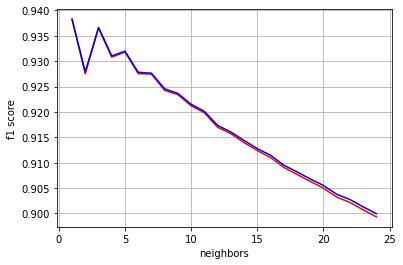

In [102]:
pyplot.grid(True)
pyplot.plot(knn_neighbors, knn_f1, color="#FF0000", label='weight')
pyplot.plot(knn_neighbors, knn_f1_micro, color="#0000FF", label='micro')
pyplot.xlabel('neighbors')
pyplot.ylabel('f1 score')
pyplot.show()

In [103]:
best_f1 = max(knn_f1)
index = knn_f1.index(best_f1)
print('Best f1 (weighted): ', best_f1)
print('Neighbors num: ', knn_neighbors[index])
print('Train time: ', knn_train_time[index])
print('Predict time: ', knn_predict_time[index])
print(knn_report[index])

Best f1 (weighted):  0.9382555113256477
Neighbors num:  1
Train time:  15.494963884353638
Predict time:  13.288710117340088
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     52801
           2       0.95      0.95      0.95     70969
           3       0.93      0.92      0.93      8929
           4       0.85      0.80      0.82       712
           5       0.83      0.84      0.83      2396
           6       0.87      0.88      0.87      4391
           7       0.95      0.95      0.95      5055

    accuracy                           0.94    145253
   macro avg       0.90      0.90      0.90    145253
weighted avg       0.94      0.94      0.94    145253



In [104]:
best_f1_micro = max(knn_f1_micro)
index = knn_f1_micro.index(best_f1_micro)
print('Best f1 (micro): ', best_f1)
print('Neighbors num: ', knn_neighbors[index])
print('Train time: ', knn_train_time[index])
print('Predict time: ', knn_predict_time[index])
print(knn_report[index])

Best f1 (micro):  0.9382555113256477
Neighbors num:  1
Train time:  15.494963884353638
Predict time:  13.288710117340088
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     52801
           2       0.95      0.95      0.95     70969
           3       0.93      0.92      0.93      8929
           4       0.85      0.80      0.82       712
           5       0.83      0.84      0.83      2396
           6       0.87      0.88      0.87      4391
           7       0.95      0.95      0.95      5055

    accuracy                           0.94    145253
   macro avg       0.90      0.90      0.90    145253
weighted avg       0.94      0.94      0.94    145253



In [105]:
models_results.append(['KNeighborsClassifier', best_f1, best_f1_micro, knn_train_time[index], knn_predict_time[index]])

Градиентный бустинг:

In [36]:
import xgboost 

xgboost_train_time = [] 
xgboost_importances = [] 
xgboost_predict_time = [] 
xgboost_f1 = []
xgboost_f1_micro = [] 
xgboost_estimators = [] 
xgboost_report = []

for estimators in range(300, 310, 10): 
    xgboost_model = xgboost.XGBClassifier(n_estimators=estimators, max_depth=10) 

    start_time = time.time() 
    xgboost_model.fit(x_train, y_train) 
    xgboost_train_time.append(time.time() - start_time) 

    start_time = time.time() 
    xgboost_result = xgboost_model.predict(x_test) 
    xgboost_predict_time.append(time.time() - start_time) 

    xgboost_f1.append(f1_score(y_test, xgboost_result, average='weighted'))
    xgboost_f1_micro.append(f1_score(y_test, xgboost_result, average='micro'))
    xgboost_report.append(classification_report(y_test, xgboost_result))
    xgboost_importances.append(xgboost_model.feature_importances_) 
    xgboost_estimators.append(estimators)
    
    print("estimators={}, f1={}".format(estimators, xgboost_f1[-1]))
    print("estimators={}, f1 (micro)={}\n".format(estimators, xgboost_f1_micro[-1]))

[18:28:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
estimators=300, f1=0.9688534783538568
estimators=300, f1 (micro)=0.9689094201152472



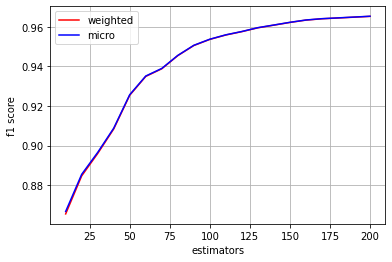

In [107]:
pyplot.grid(True) 
pyplot.plot(xgboost_estimators, xgboost_f1, color="#FF0000", label='weighted')
pyplot.plot(xgboost_estimators, xgboost_f1_micro, color="#0000FF", label='micro') 
pyplot.xlabel('estimators') 
pyplot.ylabel('f1 score') 
pyplot.legend()
pyplot.show()

In [37]:
best_f1 = max(xgboost_f1) 
index = xgboost_f1.index(best_f1) 
print('Best f1: ', best_f1) 
print('Estimatos num: ', xgboost_estimators[index]) 
print('Train time: ', xgboost_train_time[index]) 
print('Predict time: ', xgboost_predict_time[index])
print(xgboost_report[index])

Best f1:  0.9688534783538568
Estimatos num:  300
Train time:  348.96020889282227
Predict time:  2.2043631076812744
              precision    recall  f1-score   support

           1       0.97      0.96      0.97     52801
           2       0.97      0.98      0.97     70969
           3       0.97      0.97      0.97      8929
           4       0.94      0.89      0.91       712
           5       0.93      0.88      0.90      2396
           6       0.95      0.94      0.95      4391
           7       0.97      0.97      0.97      5055

    accuracy                           0.97    145253
   macro avg       0.96      0.94      0.95    145253
weighted avg       0.97      0.97      0.97    145253



In [109]:
best_f1_micro = max(xgboost_f1_micro) 
index = xgboost_f1_micro.index(best_f1_micro) 
print('Best f1 (micro): ', best_f1_micro) 
print('Estimatos num: ', xgboost_estimators[index]) 
print('Train time: ', xgboost_train_time[index]) 
print('Predict time: ', xgboost_predict_time[index])
print(xgboost_report[index])

Best f1 (micro):  0.9653845359476224
Estimatos num:  200
Train time:  158.387109041214
Predict time:  3.081791639328003
              precision    recall  f1-score   support

           1       0.97      0.96      0.96     52801
           2       0.96      0.98      0.97     70969
           3       0.96      0.97      0.97      8929
           4       0.94      0.89      0.91       712
           5       0.93      0.87      0.90      2396
           6       0.95      0.94      0.94      4391
           7       0.98      0.97      0.97      5055

    accuracy                           0.97    145253
   macro avg       0.96      0.94      0.95    145253
weighted avg       0.97      0.97      0.97    145253



<BarContainer object of 10 artists>

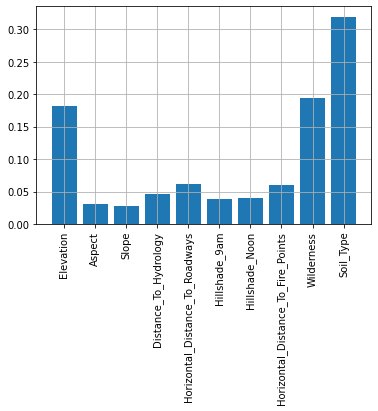

In [55]:
plt.figu
pyplot.grid(True) 
pyplot.xticks(rotation='vertical') 
pyplot.bar(train.columns, xgboost_importances[index])

In [57]:
pd.DataFrame({'feature': list(x_train.columns),
                   'importance': xgboost_importances[index]}).sort_values('importance', ascending = False).head(len(x_train.columns))

,feature,importance
9,Soil_Type,0.319428
8,Wilderness,0.194342
0,Elevation,0.181895
4,Horizontal_Distance_To_Roadways,0.061283
7,Horizontal_Distance_To_Fire_Points,0.060016
3,Distance_To_Hydrology,0.046330
6,Hillshade_Noon,0.040390
5,Hillshade_9am,0.038364
1,Aspect,0.030222
2,Slope,0.027731


In [110]:
models_results.append(['XGBClassifier', best_f1, best_f1_micro, xgboost_train_time[index], xgboost_predict_time[index]])

Случайный лес (RandomForestClassifier):

In [112]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier_estimators = []
randomForestClassifier_f1 = []
randomForestClassifier_f1_micro = []
randomForestClassifier_train_time = []
randomForestClassifier_predict_time = []
randomForestClassifier_feature_importances = []
randomForestClassifier_report = []

for estimators in range(10, 201, 10):
    randomForestClassifier = RandomForestClassifier(n_estimators = estimators, max_features=10)
    
    start_time = time.time()
    randomForestClassifier.fit(x_train, y_train)
    randomForestClassifier_train_time.append(time.time() - start_time)

    start_time = time.time()
    randomForest_result = randomForestClassifier.predict(x_test)
    randomForestClassifier_predict_time.append(time.time() - start_time)
    
    randomForestClassifier_estimators.append(estimators)
    randomForestClassifier_report.append(classification_report(y_test, randomForest_result))
    randomForestClassifier_f1.append(f1_score(y_test, randomForest_result, average='weighted'))
    randomForestClassifier_f1_micro.append(f1_score(y_test, randomForest_result, average='micro'))
    randomForestClassifier_feature_importances.append(randomForestClassifier.feature_importances_)
    
    print("estimators={}, f1={}".format(estimators, randomForestClassifier_f1[-1]))
    print("estimators={}, f1 (micro)={}\n".format(estimators, randomForestClassifier_f1_micro[-1]))

estimators=10, f1=0.9586047881903541
estimators=10, f1 (micro)=0.9587065327394271

estimators=20, f1=0.9622746871259186
estimators=20, f1 (micro)=0.9623691076948496

estimators=30, f1=0.9635327507026812
estimators=30, f1 (micro)=0.96362209386381

estimators=40, f1=0.9642376732832074
estimators=40, f1 (micro)=0.9643174323421891

estimators=50, f1=0.9643515807342103
estimators=50, f1 (micro)=0.9644344695118173

estimators=60, f1=0.9644642280494568
estimators=60, f1 (micro)=0.9645446221420556

estimators=70, f1=0.9649961750398104
estimators=70, f1 (micro)=0.9650747316750773

estimators=80, f1=0.965216064827611
estimators=80, f1 (micro)=0.9652950369355539

estimators=90, f1=0.9652766206161326
estimators=90, f1 (micro)=0.9653569977900629

estimators=100, f1=0.9651151209829162
estimators=100, f1 (micro)=0.9651917688447055

estimators=110, f1=0.9650876173851938
estimators=110, f1 (micro)=0.9651642306871459

estimators=120, f1=0.9650183195306326
estimators=120, f1 (micro)=0.965095385293247

es

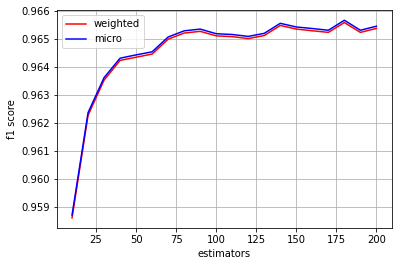

In [119]:
pyplot.grid(True)
pyplot.plot(randomForestClassifier_estimators, randomForestClassifier_f1, color="#FF0000", label='weighted')
pyplot.plot(randomForestClassifier_estimators, randomForestClassifier_f1_micro, color="#0000FF", label='micro')
pyplot.xlabel('estimators')
pyplot.ylabel('f1 score')
pyplot.legend()
pyplot.show()

In [114]:
best_f1 = max(randomForestClassifier_f1)
index = randomForestClassifier_f1.index(best_f1)
print('Best f1: ', best_f1)
print('Estimatos num: ', randomForestClassifier_estimators[index])
print('Train time: ', randomForestClassifier_train_time[index])
print('Predict time: ', randomForestClassifier_predict_time[index])
print(randomForestClassifier_report[index])

Best f1:  0.9655914676225766
Estimatos num:  180
Train time:  588.4074311256409
Predict time:  8.081377029418945
              precision    recall  f1-score   support

           1       0.97      0.96      0.97     52801
           2       0.97      0.98      0.97     70969
           3       0.95      0.97      0.96      8929
           4       0.93      0.85      0.89       712
           5       0.93      0.86      0.89      2396
           6       0.94      0.92      0.93      4391
           7       0.97      0.96      0.97      5055

    accuracy                           0.97    145253
   macro avg       0.95      0.93      0.94    145253
weighted avg       0.97      0.97      0.97    145253



<BarContainer object of 10 artists>

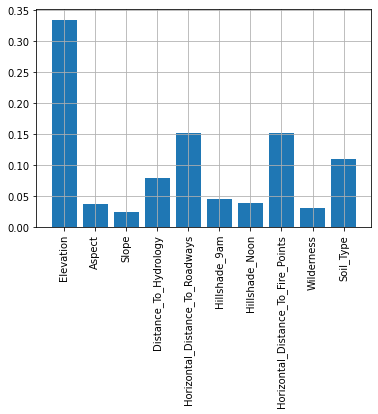

In [62]:
pyplot.grid(True)
pyplot.xticks(rotation='vertical')
pyplot.bar(train.columns, randomForestClassifier_feature_importances[index])

In [63]:
pd.DataFrame({'feature': list(x_train.columns),
                   'importance': randomForestClassifier_feature_importances[index]}).sort_values('importance', ascending = False).head(len(x_train.columns))

,feature,importance
0,Elevation,0.334614
4,Horizontal_Distance_To_Roadways,0.151294
7,Horizontal_Distance_To_Fire_Points,0.151058
9,Soil_Type,0.109810
3,Distance_To_Hydrology,0.078312
5,Hillshade_9am,0.044371
6,Hillshade_Noon,0.038842
1,Aspect,0.037306
8,Wilderness,0.030424
2,Slope,0.023971


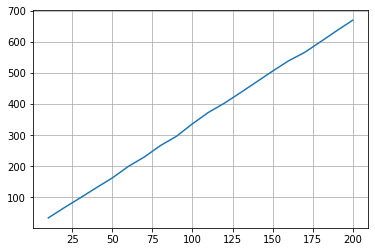

In [64]:
pyplot.grid(True)
pyplot.plot(randomForestClassifier_estimators, randomForestClassifier_train_time)
pyplot.show()

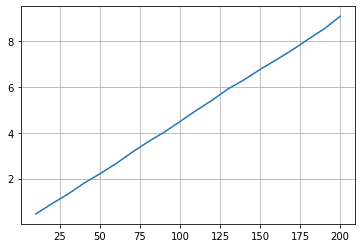

In [65]:
pyplot.grid(True)
pyplot.plot(randomForestClassifier_estimators, randomForestClassifier_predict_time)
pyplot.show()

In [115]:
best_f1_micro = max(randomForestClassifier_f1_micro)
index = randomForestClassifier_f1_micro.index(best_f1_micro)
print('Best f1 (micro): ', best_f1_micro)
print('Estimatos num: ', randomForestClassifier_estimators[index])
print('Train time: ', randomForestClassifier_train_time[index])
print('Predict time: ', randomForestClassifier_predict_time[index])
print(randomForestClassifier_report[index])

Best f1 (micro):  0.9656736866019979
Estimatos num:  180
Train time:  588.4074311256409
Predict time:  8.081377029418945
              precision    recall  f1-score   support

           1       0.97      0.96      0.97     52801
           2       0.97      0.98      0.97     70969
           3       0.95      0.97      0.96      8929
           4       0.93      0.85      0.89       712
           5       0.93      0.86      0.89      2396
           6       0.94      0.92      0.93      4391
           7       0.97      0.96      0.97      5055

    accuracy                           0.97    145253
   macro avg       0.95      0.93      0.94    145253
weighted avg       0.97      0.97      0.97    145253



In [116]:
models_results.append(['RandomForestClassifier', best_f1, best_f1_micro, randomForestClassifier_train_time[index], randomForestClassifier_predict_time[index]])

Решающее дерево:

In [117]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

start_time = time.time()
tree.fit(x_train, y_train)
tree_train_time = time.time() - start_time
print("DecisionTreeClassifier train time = {} seconds".format(tree_train_time))

start_time = time.time()
tree_result = tree.predict(x_test)
tree_predict_time = time.time() - start_time
print("DecisionTreeClassifier predict time = {} seconds".format(tree_predict_time))

tree_model_f1 = f1_score(y_test, tree_result, average='weighted')
print("DecisionTreeClassifier f1: ", tree_model_f1)

tree_model_f1_micro = f1_score(y_test, tree_result, average='micro')
print("DecisionTreeClassifier f1 (micro): ", tree_model_f1_micro)
# print("DecisionTreeClassifier macro f1: ", f1_score(y_test, tree_result, average='macro'))

print(classification_report(y_test, tree_result))

DecisionTreeClassifier train time = 4.916989803314209 seconds
DecisionTreeClassifier predict time = 0.05115556716918945 seconds
DecisionTreeClassifier f1:  0.9356289133237549
DecisionTreeClassifier f1 (micro):  0.9356639794014582
              precision    recall  f1-score   support

           1       0.94      0.93      0.94     52801
           2       0.95      0.95      0.95     70969
           3       0.92      0.93      0.92      8929
           4       0.85      0.81      0.83       712
           5       0.83      0.82      0.83      2396
           6       0.88      0.86      0.87      4391
           7       0.94      0.95      0.94      5055

    accuracy                           0.94    145253
   macro avg       0.90      0.89      0.90    145253
weighted avg       0.94      0.94      0.94    145253



<BarContainer object of 10 artists>

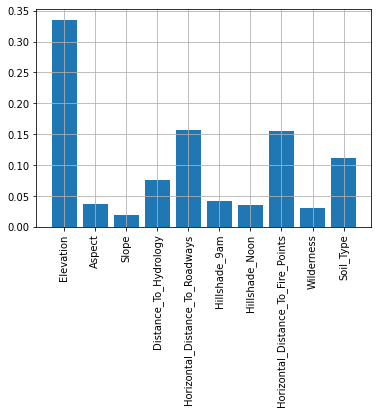

In [68]:
pyplot.grid(True)
pyplot.xticks(rotation='vertical')
pyplot.bar(train.columns, tree.feature_importances_)

In [69]:
pd.DataFrame({'feature': list(x_train.columns),
                   'importance': tree.feature_importances_}).sort_values('importance', ascending = False).head(len(x_train.columns))

,feature,importance
0,Elevation,0.335209
4,Horizontal_Distance_To_Roadways,0.156506
7,Horizontal_Distance_To_Fire_Points,0.154891
9,Soil_Type,0.111440
3,Distance_To_Hydrology,0.076430
5,Hillshade_9am,0.042351
1,Aspect,0.036813
6,Hillshade_Noon,0.035771
8,Wilderness,0.030810
2,Slope,0.019779


In [118]:
models_results.append(['DecisionTreeClassifier', tree_model_f1, tree_model_f1_micro, tree_train_time, tree_predict_time])

Выводим итоговою таблицу:

In [120]:
pd.DataFrame(models_results, columns=['Method name', 'F score (weighted)', 'F score (micro)', 'Train time', 'Predict time'])

,Method name,F score (weighted),F score (micro),Train time,Predict time
0,ExtraTreesClassifier,0.972974,0.973013,225.946948,8.561647
1,KNeighborsClassifier,0.938256,0.938253,15.494964,13.288710
2,XGBClassifier,0.965324,0.965385,158.387109,3.081792
3,RandomForestClassifier,0.965591,0.965674,588.407431,8.081377
4,DecisionTreeClassifier,0.935629,0.935664,4.916990,0.051156


In [34]:
tmp = []
tmp.append(['KNN', 0.94, 0.9, 0.9, 0.93826])
tmp.append(['Дерево решений', 0.94, 0.9, 0.89, 0.93563])
tmp.append(['Случайный лес', 0.97, 0.95, 0.93, 0.9656])
tmp.append(['Случайный лес (2)', 0.97, 0.96, 0.95, 0.97297])
tmp.append(['XGBClassifier', 0.97, 0.96, 0.94, 0.96552])

pd.DataFrame(tmp, columns=['Метод', 'accuracy', 'precision', 'recall', 'F-мера'])

,Метод,accuracy,precision,recall,F-мера
0,KNN,0.94,0.90,0.90,0.93826
1,Дерево решений,0.94,0.90,0.89,0.93563
2,Случайный лес,0.97,0.95,0.93,0.96560
3,Случайный лес (2),0.97,0.96,0.95,0.97297
4,XGBClassifier,0.97,0.96,0.94,0.96552
